In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.drop(['url'],inplace=True,axis=1)

In [3]:
X = data.drop(['shares'],axis=1)
y = data['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [4]:
reg = LinearRegression()
reg.fit(X_train,y_train)
s1 = reg.score(X_train,y_train)
s2 = reg.score(X_test,y_test)
print(s1)
print(s2)

0.025751322071249968
-0.29445068582991607


In [5]:
reg = LinearRegression(normalize=True)
reg.fit(X_train,y_train)
s1 = reg.score(X_train,y_train)
s2 = reg.score(X_test,y_test)
print(s1)
print(s2)

0.025761813676531742
-3791071058578190.0


In [6]:
scale = StandardScaler()
d = scale.fit_transform(data.drop(['shares'],axis=1))
y = data['shares']

X_train, X_test, y_train, y_test = train_test_split(d, y, test_size=0.3, random_state=10)

In [7]:
reg = LinearRegression()
reg.fit(X_train,y_train)
s1 = reg.score(X_train,y_train)
s2 = reg.score(X_test,y_test)
print(s1)
print(s2)

0.025760908131219562
-3841870712417765.5


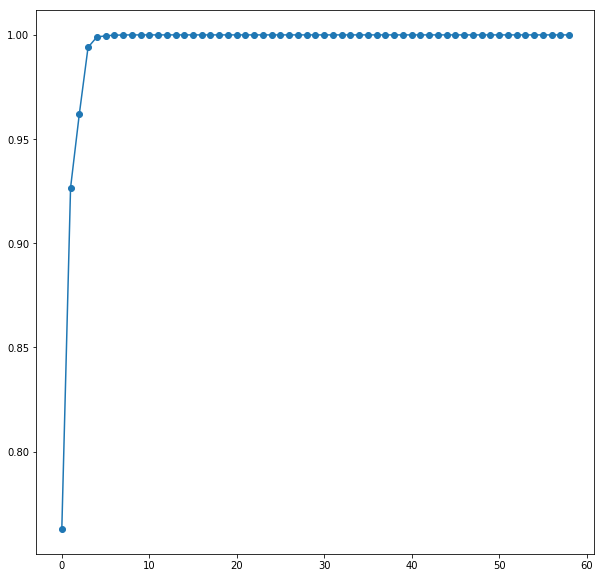

In [8]:
pca = PCA()
pca.fit(data.drop(['shares'],axis=1))
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o')

In [9]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop(['shares'],axis=1))
data_pca = pd.DataFrame(data_pca,columns = ['axis1','axis2'])
data_pca = data_pca.join(data['shares'])


X = data_pca.drop(['shares'],axis=1)
y = data_pca['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

reg = LinearRegression()
reg.fit(X_train,y_train)
s1 = reg.score(X_train,y_train)
s2 = reg.score(X_test,y_test)
print(s1)
print(s2)

0.0025566144082160847
0.0016014723457203894
